In [17]:
import pandas as pd

posts = pd.read_csv('physics_csv/Posts.csv')
votes = pd.read_csv('physics_csv/Votes.csv')
tags = pd.read_csv('physics_csv/Tags.csv')


### Question 1: Votes trend - Month/Weekday/upvote&downvote

   Id  PostId  VoteTypeId CreationDate  UserId  BountyAmount        Date  \
0   1       1           2   2010-11-02     NaN           NaN  2010-11-02   
1   2       1           2   2010-11-02     NaN           NaN  2010-11-02   
2   3       1           2   2010-11-02     NaN           NaN  2010-11-02   
3   9       1           2   2010-11-02     NaN           NaN  2010-11-02   
4  17       1           2   2010-11-02     NaN           NaN  2010-11-02   

   Month  Weekday  
0     11  Tuesday  
1     11  Tuesday  
2     11  Tuesday  
3     11  Tuesday  
4     11  Tuesday  


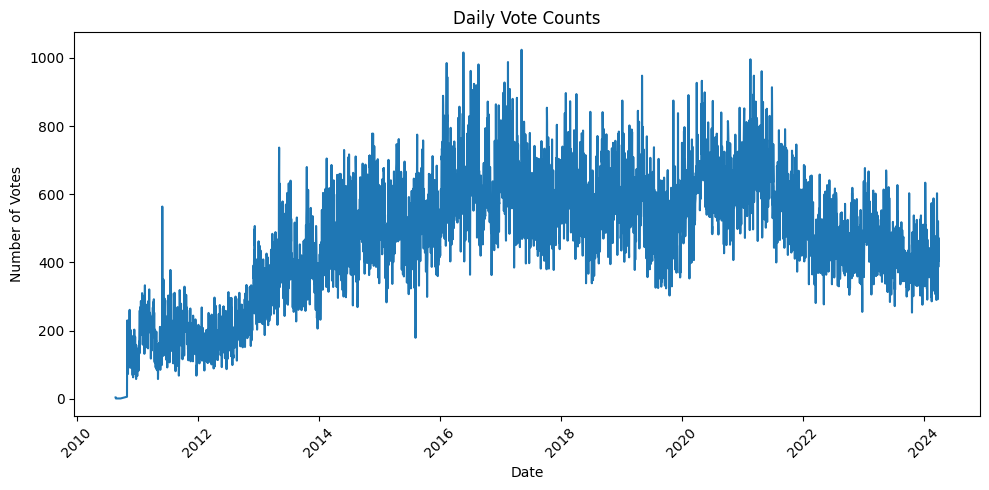

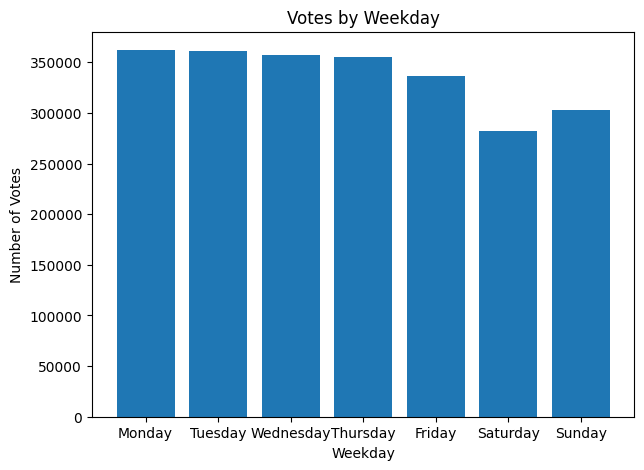

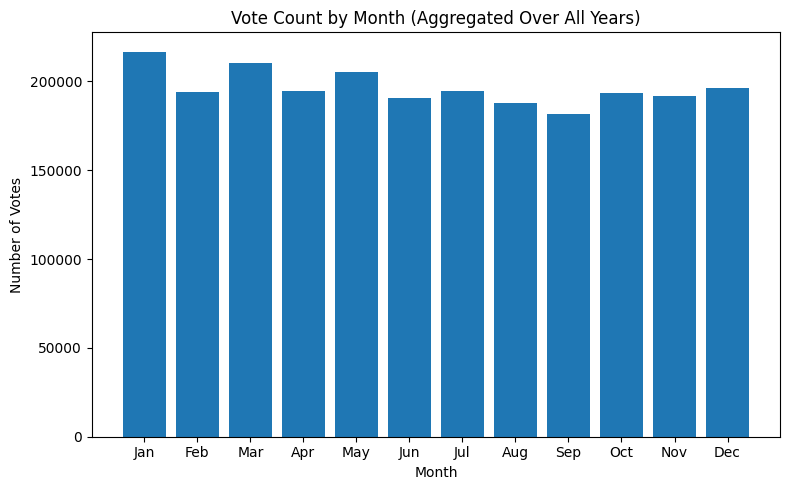

In [18]:
# Add two columns: Date and Weekday: Convert creationDate to Date-only format as Date, and Weekday
votes['CreationDate'] = pd.to_datetime(votes['CreationDate'])
votes['Date'] = votes['CreationDate'].dt.date
votes['Month'] = votes['CreationDate'].dt.month
votes['Weekday'] = votes['CreationDate'].dt.day_name()
print(votes.head())
#按日期统计投票量
daily_votes = votes.groupby('Date').size().reset_index(name='VoteCount')

#按周几统计投票量
weekday_votes = votes.groupby('Weekday').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='VoteCount')

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(daily_votes['Date'], daily_votes['VoteCount'])
plt.title('Daily Vote Counts')
plt.xlabel('Date')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.bar(weekday_votes['Weekday'], weekday_votes['VoteCount'])
plt.title('Votes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Votes')
plt.show()
#按月份
votes['Month'] = votes['CreationDate'].dt.month
monthly_votes = votes.groupby('Month').size().reset_index(name='VoteCount')
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(monthly_votes['Month'], monthly_votes['VoteCount'])
plt.title('Vote Count by Month (Aggregated Over All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Votes')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


In [ ]:
votes['Month'] = pd.to_datetime(votes['CreationDate']).dt.month
#moderator_review_monthly = votes[votes['VoteTypeId'] == 16].groupby('Month').size().reset_index(name='ModeratorReview')
#print(moderator_review_monthly)
moderator_review_monthly = votes[votes['VoteTypeId'] == 15].groupby('Month').size().reset_index(name='ModeratorReview')
print(moderator_review_monthly)

#15 & 16 are quite similar

    Month  ModeratorReview
0       1             3874
1       2             3642
2       3             4127
3       4             3723
4       5             4092
5       6             3564
6       7             3741
7       8             3591
8       9             3522
9      10             3703
10     11             3833
11     12             3735


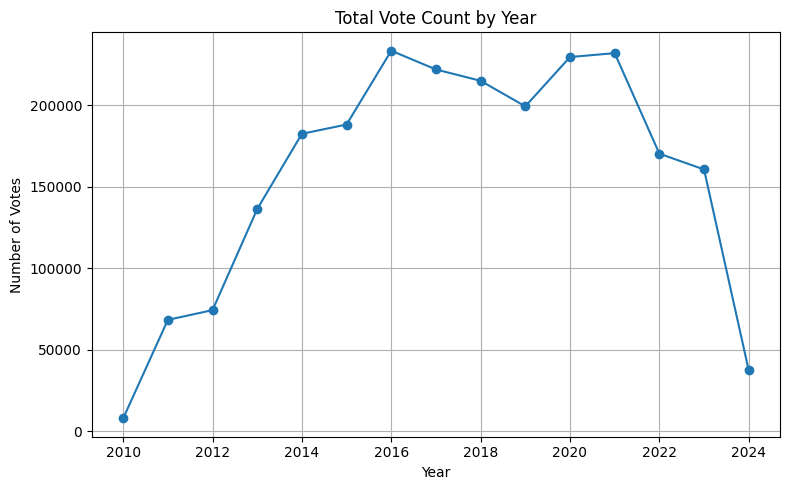

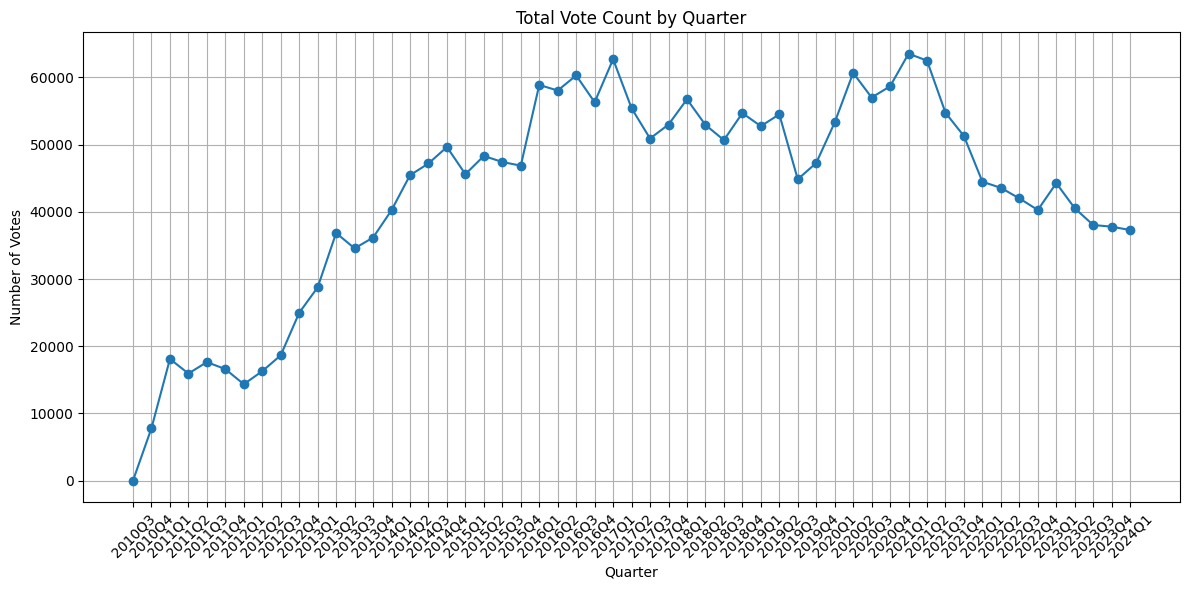

In [19]:
# 添加年份和季度
votes['Year'] = votes['CreationDate'].dt.year
votes['Quarter'] = votes['CreationDate'].dt.to_period('Q')

# 按年份统计投票量
yearly_votes = votes.groupby('Year').size().reset_index(name='VoteCount')

# 可视化：按年份投票总量
plt.figure(figsize=(8,5))
plt.plot(yearly_votes['Year'], yearly_votes['VoteCount'], marker='o')
plt.title('Total Vote Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.tight_layout()
plt.show()

# 按季度统计投票量
quarterly_votes = votes.groupby('Quarter').size().reset_index(name='VoteCount')

# 可视化：按季度投票总量
plt.figure(figsize=(12,6))
plt.plot(quarterly_votes['Quarter'].astype(str), quarterly_votes['VoteCount'], marker='o')
plt.title('Total Vote Count by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
print(votes.head)

<bound method NDFrame.head of               Id  PostId  VoteTypeId CreationDate  UserId  BountyAmount  \
0              1       1           2   2010-11-02     NaN           NaN   
1              2       1           2   2010-11-02     NaN           NaN   
2              3       1           2   2010-11-02     NaN           NaN   
3              9       1           2   2010-11-02     NaN           NaN   
4             17       1           2   2010-11-02     NaN           NaN   
...          ...     ...         ...          ...     ...           ...   
2357499  2941929  808513           2   2024-03-31     NaN           NaN   
2357500  2941955  808513           2   2024-03-31     NaN           NaN   
2357501  2941943  808516           3   2024-03-31     NaN           NaN   
2357502  2941966  808522           3   2024-03-31     NaN           NaN   
2357503  2941969  808522           3   2024-03-31     NaN           NaN   

               Date  Month  Weekday  Year Quarter  
0        2010-11-

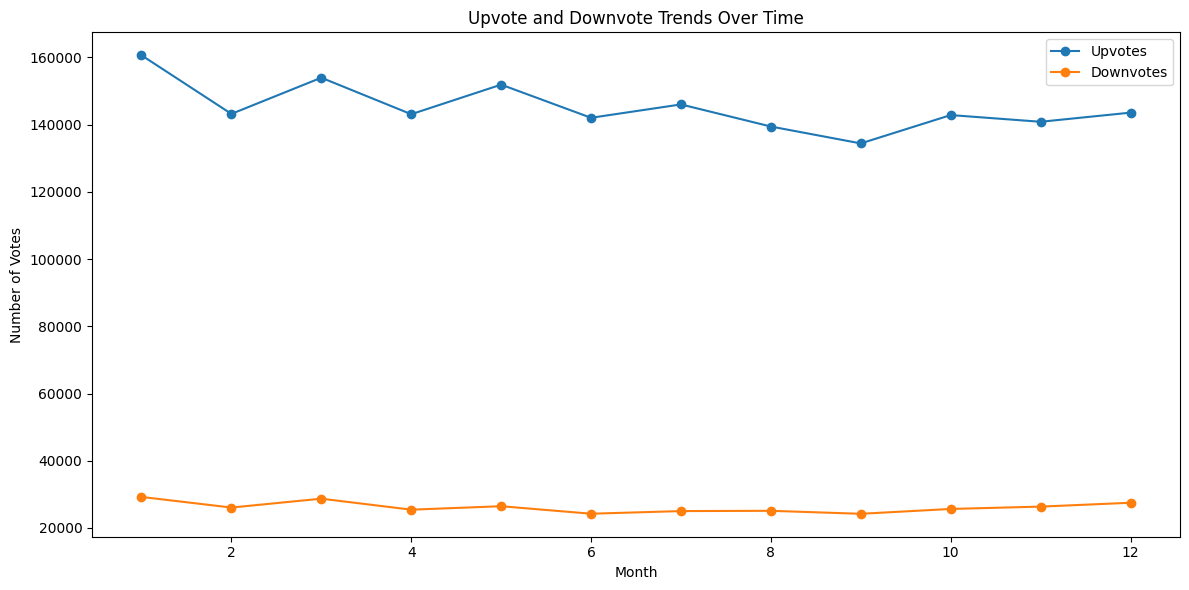

In [21]:
upvote = votes[votes['VoteTypeId'] == 2]
downvote = votes[votes['VoteTypeId'] == 3]
#print(upvote.head())
upvote_counts = upvote.groupby('Month').size().reset_index(name='UpvoteCount')
downvote_counts = downvote.groupby('Month').size().reset_index(name='DownvoteCount')

merged = pd.merge(upvote_counts, downvote_counts, on='Month', how='outer').fillna(0)

plt.figure(figsize=(12,6))
plt.plot(merged['Month'], merged['UpvoteCount'], marker='o', label='Upvotes')
plt.plot(merged['Month'], merged['DownvoteCount'], marker='o', label='Downvotes')
plt.title('Upvote and Downvote Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

##### plot top 6 most commen votetype trend over time

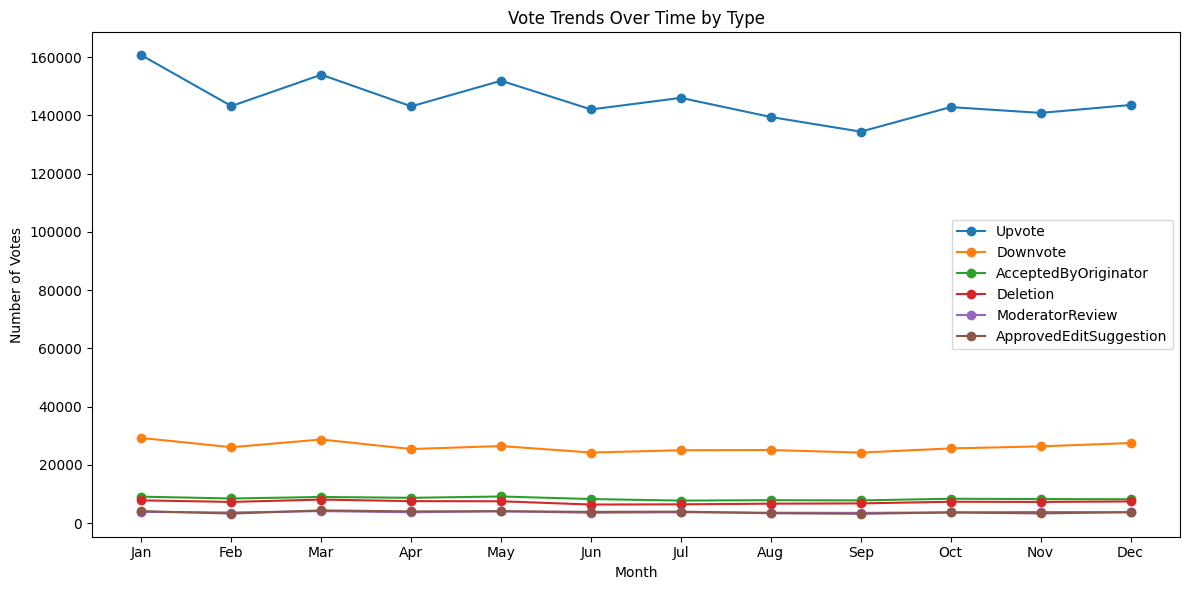

In [22]:
vote_types = {
    2: 'Upvote',
    3: 'Downvote',
    1: 'AcceptedByOriginator',
    10: 'Deletion',
    15: 'ModeratorReview',
    16: 'ApprovedEditSuggestion'
}

# 初始化空DataFrame
merged = pd.DataFrame({'Month': range(1, 13)})

# 遍历每种投票类型并统计数量
for vtype, label in vote_types.items():
    counts = votes[votes['VoteTypeId'] == vtype].groupby('Month').size().reset_index(name=label)
    merged = pd.merge(merged, counts, on='Month', how='left')


merged.fillna(0, inplace=True)


plt.figure(figsize=(12,6))
for label in vote_types.values():
    plt.plot(merged['Month'], merged[label], marker='o', label=label)

plt.title('Vote Trends Over Time by Type')
plt.xlabel('Month')
plt.ylabel('Number of Votes')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.tight_layout()
plt.show()


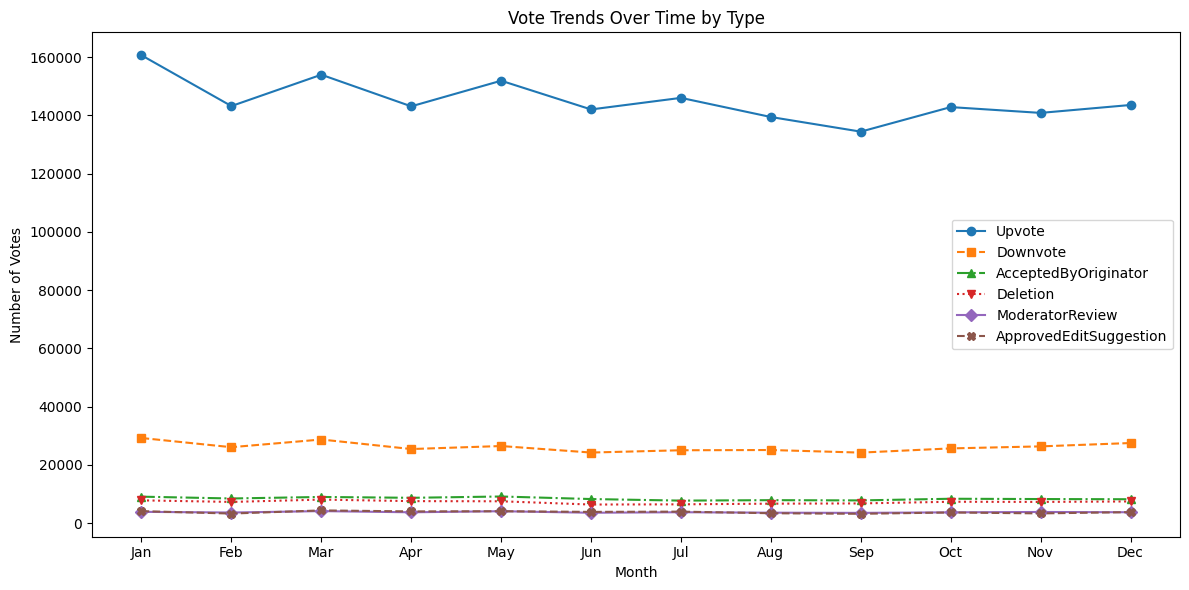

In [23]:
import matplotlib.pyplot as plt

vote_types = {
    2: 'Upvote',
    3: 'Downvote',
    1: 'AcceptedByOriginator',
    10: 'Deletion',
    15: 'ModeratorReview',
    16: 'ApprovedEditSuggestion'
}

# 初始化空DataFrame
merged = pd.DataFrame({'Month': range(1, 13)})

# 遍历每种投票类型并统计数量
for vtype, label in vote_types.items():
    counts = votes[votes['VoteTypeId'] == vtype].groupby('Month').size().reset_index(name=label)
    merged = pd.merge(merged, counts, on='Month', how='left')

merged.fillna(0, inplace=True)

# 定义不同 marker 和 linestyle
markers = {
    'Upvote': 'o',
    'Downvote': 's',
    'AcceptedByOriginator': '^',
    'Deletion': 'v',
    'ModeratorReview': 'D',  # diamond marker
    'ApprovedEditSuggestion': 'X'
}

linestyles = {
    'Upvote': '-',
    'Downvote': '--',
    'AcceptedByOriginator': '-.',
    'Deletion': ':',
    'ModeratorReview': '-',
    'ApprovedEditSuggestion': '--'
}

plt.figure(figsize=(12,6))
for label in vote_types.values():
    plt.plot(
        merged['Month'], 
        merged[label], 
        marker=markers.get(label, 'o'), 
        linestyle=linestyles.get(label, '-'), 
        label=label
    )

plt.title('Vote Trends Over Time by Type')
plt.xlabel('Month')
plt.ylabel('Number of Votes')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.tight_layout()
plt.show()


### Question 2: User's Votes Trends 

In [ ]:
users = pd.read_csv('physics_csv/Users.csv')
#print(users.head())

# merge votes and users
votes_users = pd.merge(votes, users, left_on='UserId', right_on='Id', how='left')
print(votes_users.columns)




Index(['Id_x', 'PostId', 'VoteTypeId', 'CreationDate_x', 'UserId',
       'BountyAmount', 'Date', 'Weekday', 'YearMonth', 'Month', 'Id_y',
       'Reputation', 'CreationDate_y', 'DisplayName', 'LastAccessDate',
       'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes',
       'AccountId'],
      dtype='object')


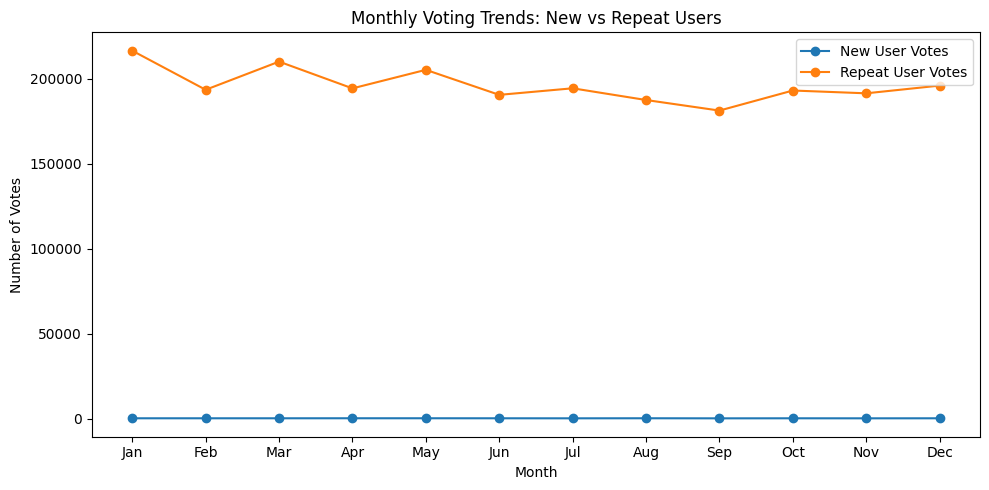

In [44]:
# Step 1: 提取用户首次投票日期（按 UserId）
first_vote = votes_users.groupby('UserId')['CreationDate_x'].min().reset_index().rename(columns={'CreationDate_x':'FirstVoteDate'})

# Step 2: 合并首次投票日期
votes_users = pd.merge(votes_users, first_vote, on='UserId', how='left')

# Step 3: 标记是否首次投票
votes_users['IsFirstVote'] = votes_users['CreationDate_x'] == votes_users['FirstVoteDate']

# Step 4: 按 Month 统计新用户投票和重复用户投票数量
first_votes_month = votes_users[votes_users['IsFirstVote']].groupby('Month').size().reset_index(name='NewUserVotes')
repeat_votes_month = votes_users[~votes_users['IsFirstVote']].groupby('Month').size().reset_index(name='RepeatUserVotes')

# Step 5: 合并结果
vote_trend = pd.merge(first_votes_month, repeat_votes_month, on='Month', how='outer').fillna(0)

# Step 6: 可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(vote_trend['Month'], vote_trend['NewUserVotes'], marker='o', label='New User Votes')
plt.plot(vote_trend['Month'], vote_trend['RepeatUserVotes'], marker='o', label='Repeat User Votes')
plt.title('Monthly Voting Trends: New vs Repeat Users')
plt.xlabel('Month')
plt.ylabel('Number of Votes')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.tight_layout()
plt.show()


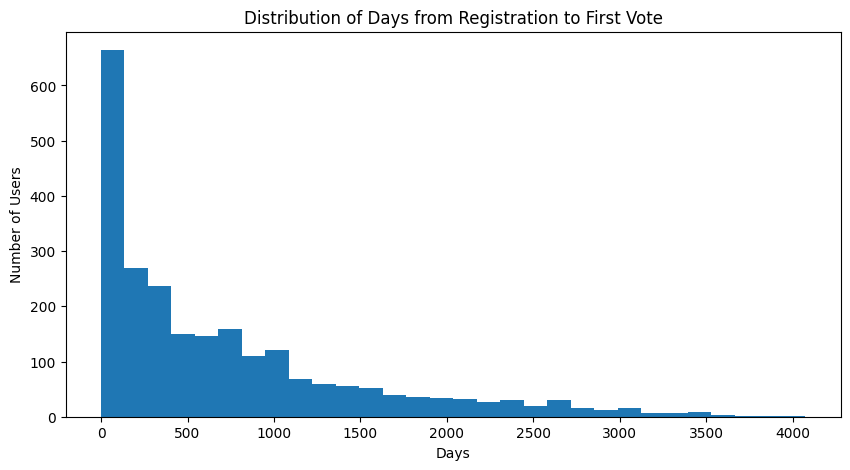

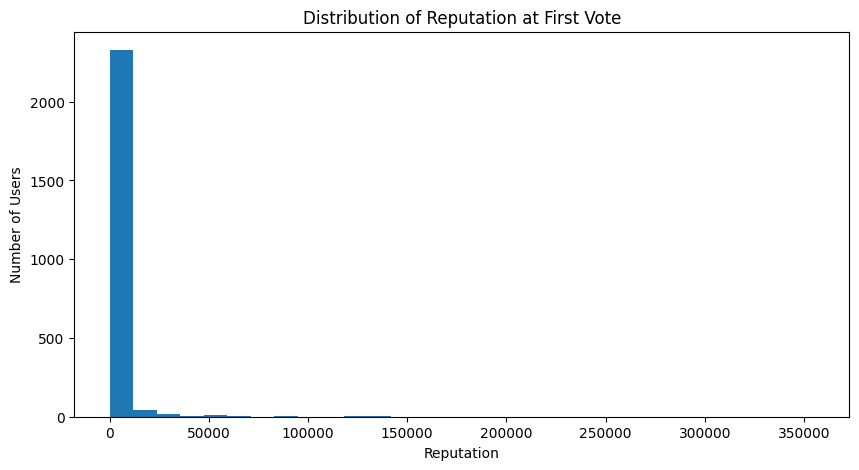

In [ ]:
votes_users['CreationDate_x'] = pd.to_datetime(votes_users['CreationDate_x']) #votes date
votes_users['CreationDate_y'] = pd.to_datetime(votes_users['CreationDate_y']) #users date

# how many days different from sign up to vote
votes_users['DaysToVote'] = (votes_users['CreationDate_x'] - votes_users['CreationDate_y']).dt.days

# keep the first vote only
first_vote_per_user = votes_users.groupby('UserId').first().reset_index()


import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(first_vote_per_user['DaysToVote'].dropna(), bins=30)
plt.title('Distribution of Days from Registration to First Vote')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.show()

# 绘制首次投票时的声望分布
plt.figure(figsize=(10,5))
plt.hist(first_vote_per_user['Reputation'].dropna(), bins=30)
plt.title('Distribution of Reputation at First Vote')
plt.xlabel('Reputation')
plt.ylabel('Number of Users')
plt.show()


### Question 3: Popular and Highly Voted Tags
-> Star tags: Tags that are both popular (many posts) and highly voted.

-> Niche tags: Tags that are associated with fewer posts but receive high vote counts.

-> Unpopular tags: Tags with many posts but low total vote counts.

In [34]:
print(posts['Tags'].head())

0    |quantum-mechanics|particle-physics|angular-mo...
1                            |string-theory|education|
2    |particle-physics|group-theory|representation-...
3                                                  NaN
4                                                  NaN
Name: Tags, dtype: object


In [36]:
print(tags.head())

   Id             TagName  Count  ExcerptPostId  WikiPostId
0   1        quantum-spin   2775        19257.0     19256.0
1   2           subatomic    174        76305.0     76304.0
2   3       string-theory   2699        13887.0     13886.0
3   4    particle-physics   6567         9930.0      9929.0
4   5  general-relativity  13760         9977.0      9976.0


In [35]:
#remove all | in Tags column
posts['Cleaned_Tags'] = posts['Tags'].str.strip('|').str.split('|')
#print(posts[['Tags', 'Cleaned_Tags']])

